# Frequenz-Unterschiede in Cent

Bei mikrotonalen Intervallen wird der Unterschied zweier Frequenzen in Cent angegeben. Hierbei ergeben 100 Cent einen Halbton, d.h. ein Viertelton wären 50 Cent.

Die [Formel](https://de.wikipedia.org/wiki/Cent_(Musik)#Von_Proportionen_in_Cent) um den Unterschied auszurechnen ist:
\\(i = 1200 \cdot log_{2}(\frac{F_1}{F_2})\\)

<div style="background-color:lightyellow">

**Aufgabe 1:**
    
Schreibt eine Funktion `calc_cents` basierend auf der oben stehenden Formel.
    
</div>

In [1]:
from math import log2


def calc_cents(freq1, freq2):
    return 1200 * log2(freq1/freq2)

freq1 = 440
freq2 = 450
print('F1: %d, F2: %d, Intervall: %f Cent' % (freq1, freq2, calc_cents(freq1, freq2)))

F1: 440, F2: 450, Intervall: -38.905773 Cent


# Harmonische Obertonreihe

Obertöne sind mitschwingende "Töne" auf einem Grundton.

Die Frequenzen einer harmonischen Obertonreihe sind ganzzahlige Vielfache der Grundtonfrequenz - also \\(F \cdot 1\\), \\(F \cdot 2\\), \\(F \cdot 3\\), \\(F \cdot 4\\), usw.

Dabei kommen – basierend auf **C** etwa folgende Obertöne heraus:

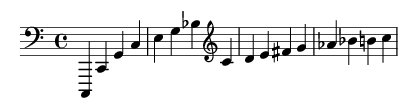

Für Interessierte: Der [lilypond](https://lilypond.org/) Code für die Graphik:

```\relative {
	\clef bass c,, c' g' c e g bes \clef violin c d e fis g aes bes b c
}```

<div style="background-color:lightyellow">

**Aufgabe 2:**
    
Betreibt mit der Funktion `generate_additive` additive Synthese basierend auf den ersten sechzehn Tönen der harmonischen Obertonreihe mit einem Grundton eurer Wahl.
    
</div>

In [7]:
import numpy as np
import IPython.display as ipd

def generate_additive(freqs=[100, 200, 300], dur=3, sr=44100):
    t = np.linspace(0, dur, int(sr * dur))
    x = np.zeros_like(t)

    for freq in freqs:
        x = x + (np.sin(t * 2 * np.pi * freq) / (len(freqs) + 1))
    
    return x, sr

In [10]:
# euer Code:
freqs_series1 = [x*100 for x in range(16)]


harmonic_series1, sr = generate_additive(freqs_series1)

ipd.display(ipd.Audio(harmonic_series1, rate=sr))

<div style="background-color:lightyellow">

**Aufgabe 3:**
    
Macht dasselbe, aber diesmal basierend auf den in etwa der Obertonreihe entsprechenden Tönen des temperierten Stimmungssystems.

Tipp: hierfür benötigt ihr wieder eine Funktion zum Umrechnen von MIDI in Frequenz (in Hz).
    
</div>

In [19]:
pitch_series = np.array([ 0, 12, 19, 24, 28, 31, 34, 36,
                         38, 40, 42, 43, 44, 46, 47, 48])

def midi_to_frequency(pitch):
    """Returns the frequency representation of the midi keynum PITCH"""
    return 440 * pow(2, (pitch-69)/12)

# Habe +3 Oktaven gemacht, da es so besser zu hören ist
freqs_series2 = [midi_to_frequency(p+12*3) for p in pitch_series]

harmonic_series2, sr = generate_additive(freqs_series2)

ipd.display(ipd.Audio(harmonic_series2, rate=sr))

Mit unserer zuvor geschriebenen `calc_cents` Funktion können wir jetzt die genauen Unterschiede in Hz zwischen der harmonischen Obertonreihe und den entsprechenden Tonhöhen aus der temperierten Stimmung ausrechnen:

In [21]:
pitchclasses = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

freqs_series = np.arange(1, 17) * midi_to_frequency(48)
pitches = np.array([ 0, 12, 19, 24, 28, 31, 34, 36,
                    38, 40, 42, 43, 44, 46, 47, 48]) + 48

for freq, pitch in zip(freqs_series, pitches):
    
    micro_intervall = calc_cents(freq, midi_to_frequency(pitch))

    print('%2s: Frequenz (Obertonreihe): %8.2f, Frequenz (temperiert): %8.2f, Intevall: %6.2f Cent' % (pitchclasses[pitch % 12], freq, midi_to_frequency(pitch), micro_intervall))

 C: Frequenz (Obertonreihe):   130.81, Frequenz (temperiert):   130.81, Intevall:   0.00 Cent
 C: Frequenz (Obertonreihe):   261.63, Frequenz (temperiert):   261.63, Intevall:   0.00 Cent
 G: Frequenz (Obertonreihe):   392.44, Frequenz (temperiert):   392.00, Intevall:   1.96 Cent
 C: Frequenz (Obertonreihe):   523.25, Frequenz (temperiert):   523.25, Intevall:   0.00 Cent
 E: Frequenz (Obertonreihe):   654.06, Frequenz (temperiert):   659.26, Intevall: -13.69 Cent
 G: Frequenz (Obertonreihe):   784.88, Frequenz (temperiert):   783.99, Intevall:   1.96 Cent
A#: Frequenz (Obertonreihe):   915.69, Frequenz (temperiert):   932.33, Intevall: -31.17 Cent
 C: Frequenz (Obertonreihe):  1046.50, Frequenz (temperiert):  1046.50, Intevall:   0.00 Cent
 D: Frequenz (Obertonreihe):  1177.32, Frequenz (temperiert):  1174.66, Intevall:   3.91 Cent
 E: Frequenz (Obertonreihe):  1308.13, Frequenz (temperiert):  1318.51, Intevall: -13.69 Cent
F#: Frequenz (Obertonreihe):  1438.94, Frequenz (temperiert)

In [23]:
print("Herzlich,\nAmir")

Herzlich,
Amir
